# Rule-based query answering method for a knowledge base of economic crimes
## 2.Preliminaries
### 2.1 Theoretical Background
#### 2.1.1 First-order Logic

##### 2.1.1.1 Syntax
- Definition 2.1 (`Alphabet`). An alphabet of the first-order logic consists of the following symbols:
  - A set of constants: a, b, c, ...
  - A set of variables: ?x, ?y, ?z, ...
  - A set of function symbols: f, g, ..., where each function symbol has assigned arity (a natural number).
  - A set of predicate symbols: p,q,..., where each predicate symbol has as- signed arity (a natural number).
  - A set of logical connectives: ¬ (negation), ∧ (conjunction), ∨ (disjunction), → (implication) and ↔ (material equivalence).
  - Two quantifiers: ∃ (existential) and ∀ (universal).
  - A set of punctuation symbols: ‘(’, ‘)’ and ‘,’.

A symbol of arity 1 is called a `unary` symbol; a symbol of arity 2 is called a `binary` symbol; a symbol of arity n is called `n-ary` symbol. The arity of a symbol may be 0. Such symbols are `constants`.

- Definition 2.2 (`Term`). A term is defined as follows:
  1. A variable is a term.
  2. A constant is a term.
  3. If f is an n-ary function symbol with arity n and $t_1, t_2, ..., t_n$ are terms, then $f(t_1, t_2, ..., t_n)$ is a term.
- Definition 2.3 (`Ground term`). A term which does not contain any variables is called a ground term.
- Definition 2.4 (`Atom`). Let p be a predicate symbol with arity n. Let $t_1, t_2, ..., t_n$ be terms, then $p(t_1, t_2, ..., t_n)$ is an atom (or atomic formula). An atom which does not contain any variables is called a ground atom.
- Definition 2.5 (`Well-formed Formula`). A well formed formula (or just formula) is defined as follows:
  1. An atom is a formula.
  2. If B and H are formulae then:
      - ¬B is a formula
      - B∧H is a formula
      - B∨H is a formula
      - B→H is a formula
      - B≡H is a formula
  3. If B is a formula and x is a variable, then (∃xH) and (∀xH) are formulae.
- Definition 2.6 (Scope of Variables). If x is a variable and H is a formula then the scope of x in ∃xH and of ∀x in ∀xH is H. Combinations of ∃x and ∀x bind every occurrence of x in their scope. An occurrence of a variable which is not bound is called free.
- Definition 2.7 (Open and Closed Formula). A formula is open if it has free variables. If a formula has no free variables then it is closed.
- Definition 2.8 (Literal). Let H be an atom. Then ¬H and H are called literals, whereas H is called positive literal, while ¬H is called negative literal.
- Definition 2.9 (`First-order Language`). A First-order language is defined over an alphabet and consists of the set of all well-formed formulae that can be constructed from the symbols of the alphabet. A FOL language is called function-free if it does not contain any function symbol (a set of functions symbols is an empty set).

##### 2.1.1.2 Semantics
Informally, the semantics of the first-order logic language is defined by attributing meaning (or truth values) to well-formed formulae (sentences). The sentences are mapped to some statements about a given domain through a process known as `interpretation`. If an interpretation gives the `true` value to a sentence then it is said to `satisfy` the sentence. Such an interpretation is called a `model` for the sentence.

- Definition 2.10 (`Interpretation`). An interpretation I consists of the following:
    1. A non-empty set $\Delta^I$ called the universe of I or the domain of the interpretation. The members of $\Delta^I$ are called individuals of I.
    2. An interpretation function $\cdot^I$ , which assigns elements of the alphabet to $\Delta^I$ satisfying the following conditions:
        - Each constant c is mapped to an element $c^I \in \Delta^I$
        - Each function symbol f of arity n is mapped to a function: 
          - $f^I :(\Delta^I)^n \to \Delta^I$
        - Each predicate symbol p of arity n is mapped to a function: 
          - $p^I :(\Delta^I)^n \to \{true,false\}$
- Definition 2.11 (`Assignment`).
    1. Variable Assignment. A variable assignment is a mapping function σ, which assigns an element $c \in \Delta^I$ to every variable x from a set of variables $\bar{X}$:
       - $\sigma : \bar{X} \to \Delta^I$
    1. Term Assignment. The term assignment w.r.t. σ of the term $t \in \Delta^I$ is defined as:
        - Each variable assignment is given according to σ,
        - Each constant assignment is given according to I,
        - If $t^`_1, t^`_2, ..., t^`_n$ are term assignments of $t_1, t_2, ..., t_n$ and $f^`$ is the assignment of the function symbol f with arity n according to I, then $f^`(t^`_1,t^`_2,...,t^`_n) \in \Delta^I$ is the term assignment of $f(t_1,t_2,...,t_n)$.
- Definition 2.12 (`Truth Values`). The valuation of formula F is defined as follows:
    - If the formula is an atom $p(t_1,t_2,...,t_n)$ with arity n then the value is obtained by calculating the value of $p^`(t^`_1, t^`_2, ..., t^`_n)$ where p′ is the mapping assigned to p by I and $t^`_1, t^`_2, ..., t^`_n$ are the term assignments of $t_1,t_2,...,t_n$ w.r.t. to σ and I.
    - The truth values of formulae B and H are given in Table 2.1
        - 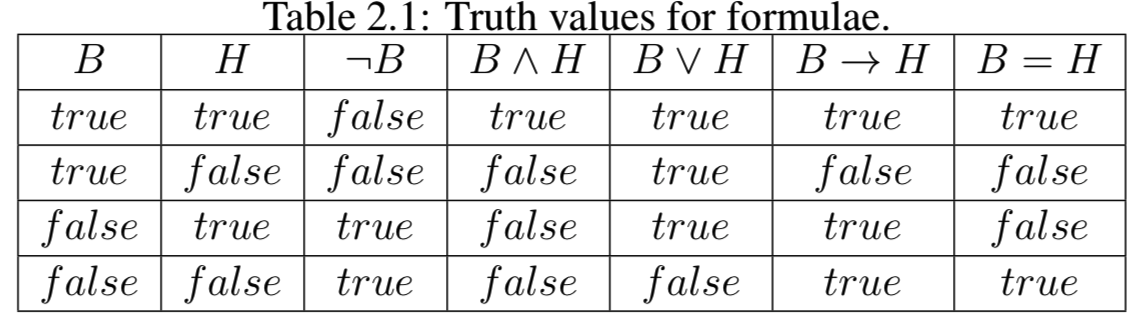











#### 2.1.2 Datalog as a First-order Rule Language
Characteristic of Datalog as a rule language is a feature called `recursion` which allows the result of a rule can to be used as one of the rule’s premises. Datalog uses the `closed world semantics` which also occurs in relational databases. It means that facts that cannot be proven are considered false.

##### 2.1.2.1 Syntax
- Definition 2.19 (`Datalog rule`). A Datalog rule is an expression of the following form:
    - $p_1(\bar{X}_1), p_2(\bar{X}_2), ..., p_n(\bar{X}_n) \to h(\bar{X}_h)$ (2.1)
    - where $n \ge 1, p_1, ..., p_n$, h are predicates (relation names) of appropriate arities and $\bar{X}_1, ..., \bar{X}_n, \bar{X}_h$ are sets of terms.
- Definition 2.20 (`Datalog safety`). Each variable occurring in $\bar{X}_h$ must occur at least in one of $\bar{X}_1, ..., \bar{X}_n$.
- Definition 2.21 (`Datalog program`, the `body` and the `head`). A finite set of Datalog rules is called a Datalog program. The premise of a Datalog rule is called the body (denoted as B) while the conclusion is called the head of a rule (denoted as H).
    - The (2.1) form of a rule is logically equivalent to a disjunction of literals where at most one is positive. Such (2.2) formulae are called `Horn clauses`. From that reason a Datalog program can be viewed as a set of Horn clauses.
    - $\lnot p_1(\bar{X}_1) \lor \lnot p_2(\bar{X}_2) \lor ... \lor \lnot p_n(\bar{X}_n) \lor h(\bar{X}_h)$ (2.2)
    - The body of the rule can be called as: premises, antecedents, conditions or if-part of the rule. The head of the rule can be called as: conclusion, consequent or then-part of the rule.
    - It is common to omit the universal quantifier (∀) since all variables in Datalog are universally quantified. Rules with an empty body are called `facts` while rules with an empty head are called `constraints` and are used to express the fact that interpretations satisfying the conditions in the body of the rule are not admitted.
    - An `extensional` relation is an n-ary predicate which is used to represent facts stored in a database according to the extensional (database) schema, denoted edb(P). Any other predicate is called an `intensional` relation which is defined by a rule (by appearing in the head of a rule). Set of all intensional relations forms the intensional (database) schema, denoted idb(P). The schema of P, denoted sch(P), is the union of edb(P) and idb(P).
- Definition 2.22 (`Datalog conjunctive query`). A Datalog conjunctive query is a Datalog rule of the following form:
    - $p_1(\bar{X}_1) \land ... \land p_n(\bar{X}_n) \to answer(\bar{X}_a)$
    - where n ≥ 0, the $p_i$ are extensional predicates, `answer` is an intensional predicate, $\bar{X}_a, \bar{X}_1, ..., \bar{X}_n$ are lists of terms of appropriate arities and the rule is range restricted, i.e., each variable in $\bar{X}_a$ also occurs in at least one of $\bar{X}_1, ..., \bar{X}_n$ (Datalog safety).

An example of a rule which exploits `recursion` is the following:

$ancestorOf (?x, ?y) \land ancestorOf (?y, ?z) \to ancestorOf (?x, ?z)$ (2.3)

The predicate ancestorOf is used both in the head and the body of the rule. It means that the result of the rule can also be used in the next application (firing) of the rule.